# Creating a Graph with Nodes and Edges For NBA Playoff Teams

When software developers are starting to work in a new environment, they are encouraged to start with a simple
“beachhead” program.
In this assignment, you’re asked to create the nodes and edges for a basic graph:

## Dataset

For this assignment, I used a dataset containing player statistics from the 2023-2024 NBA playoffs. The dataset was downloaded from Kaggle, which you can find here: https://www.kaggle.com/datasets/mohamedsaqibshouqi/2023-2024-nba-player-stats-playoffs/data

In [25]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv("/Users/mohamedhassan/Downloads/NBA Stats 202324 All Stats  NBA Player Props Tool (4).csv")

In [27]:
df.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C,30.2,6,41.4,35.7,15.8,78,...,5.7,1.2,1.5,4.2,43.8,38.7,49.5,12.2,117.1,108.0
1,2,Jalen Brunson,Nyk,G,27.8,13,39.8,36.4,9.3,120,...,7.5,0.8,0.2,2.7,35.7,39.8,43.2,9.3,114.8,114.7
2,3,Damian Lillard,Mil,G,33.9,4,39.1,31.4,10.0,38,...,5.0,1.0,0.0,2.3,34.5,36.3,39.5,8.2,127.6,115.7
3,4,Shai Gilgeous-Alexander,Okc,G,25.9,10,39.9,32.3,8.9,81,...,6.4,1.3,1.7,2.2,37.4,36.6,43.8,11.2,118.3,106.9
4,5,Tyrese Maxey,Phi,G,23.6,6,44.6,28.1,8.6,28,...,6.8,0.8,0.3,2.2,35.0,36.7,41.8,9.1,120.9,113.3


Using the networkx library, I created nodes using the NBA teams that were in the playoffs, grouping by team:

In [28]:
df2 = df.groupby(['TEAM'],as_index=False).sum()

In [29]:
playoff_teams = df2['TEAM'].tolist()

In [30]:
playoff_teams

['Bos',
 'Cle',
 'Dal',
 'Den',
 'Ind',
 'Lac',
 'Lal',
 'Mia',
 'Mil',
 'Min',
 'Nor',
 'Nyk',
 'Okc',
 'Orl',
 'Phi',
 'Pho']

In [31]:
g = nx.Graph()

In [32]:
g.add_nodes_from(playoff_teams)

In [33]:
list(g.nodes())

['Bos',
 'Cle',
 'Dal',
 'Den',
 'Ind',
 'Lac',
 'Lal',
 'Mia',
 'Mil',
 'Min',
 'Nor',
 'Nyk',
 'Okc',
 'Orl',
 'Phi',
 'Pho']

I based the edges on the team matchups during the playoffs, which you can find here: https://www.nba.com/playoffs/2024/bracket

In [34]:
g.add_edges_from([("Bos","Mia"),("Bos","Cle"),("Bos","Ind"),("Bos","Dal"),
                  ("Dal","Lac"),("Dal","Okc"),("Dal","Min"),
                  ("Ind","Mil"),("Ind","Nyk"), 
                  ("Min","Pho"),("Min","Den"),
                  ("Nyk","Phi"), 
                  ("Cle","Orl"),
                  ("Okc","Nor"),
                  ("Den","Lal")])

In [35]:
list(g.edges())

[('Bos', 'Mia'),
 ('Bos', 'Cle'),
 ('Bos', 'Ind'),
 ('Bos', 'Dal'),
 ('Cle', 'Orl'),
 ('Dal', 'Lac'),
 ('Dal', 'Okc'),
 ('Dal', 'Min'),
 ('Den', 'Min'),
 ('Den', 'Lal'),
 ('Ind', 'Mil'),
 ('Ind', 'Nyk'),
 ('Min', 'Pho'),
 ('Nor', 'Okc'),
 ('Nyk', 'Phi')]

In total, there are 16 teams that made the playoffs and 15 matchups

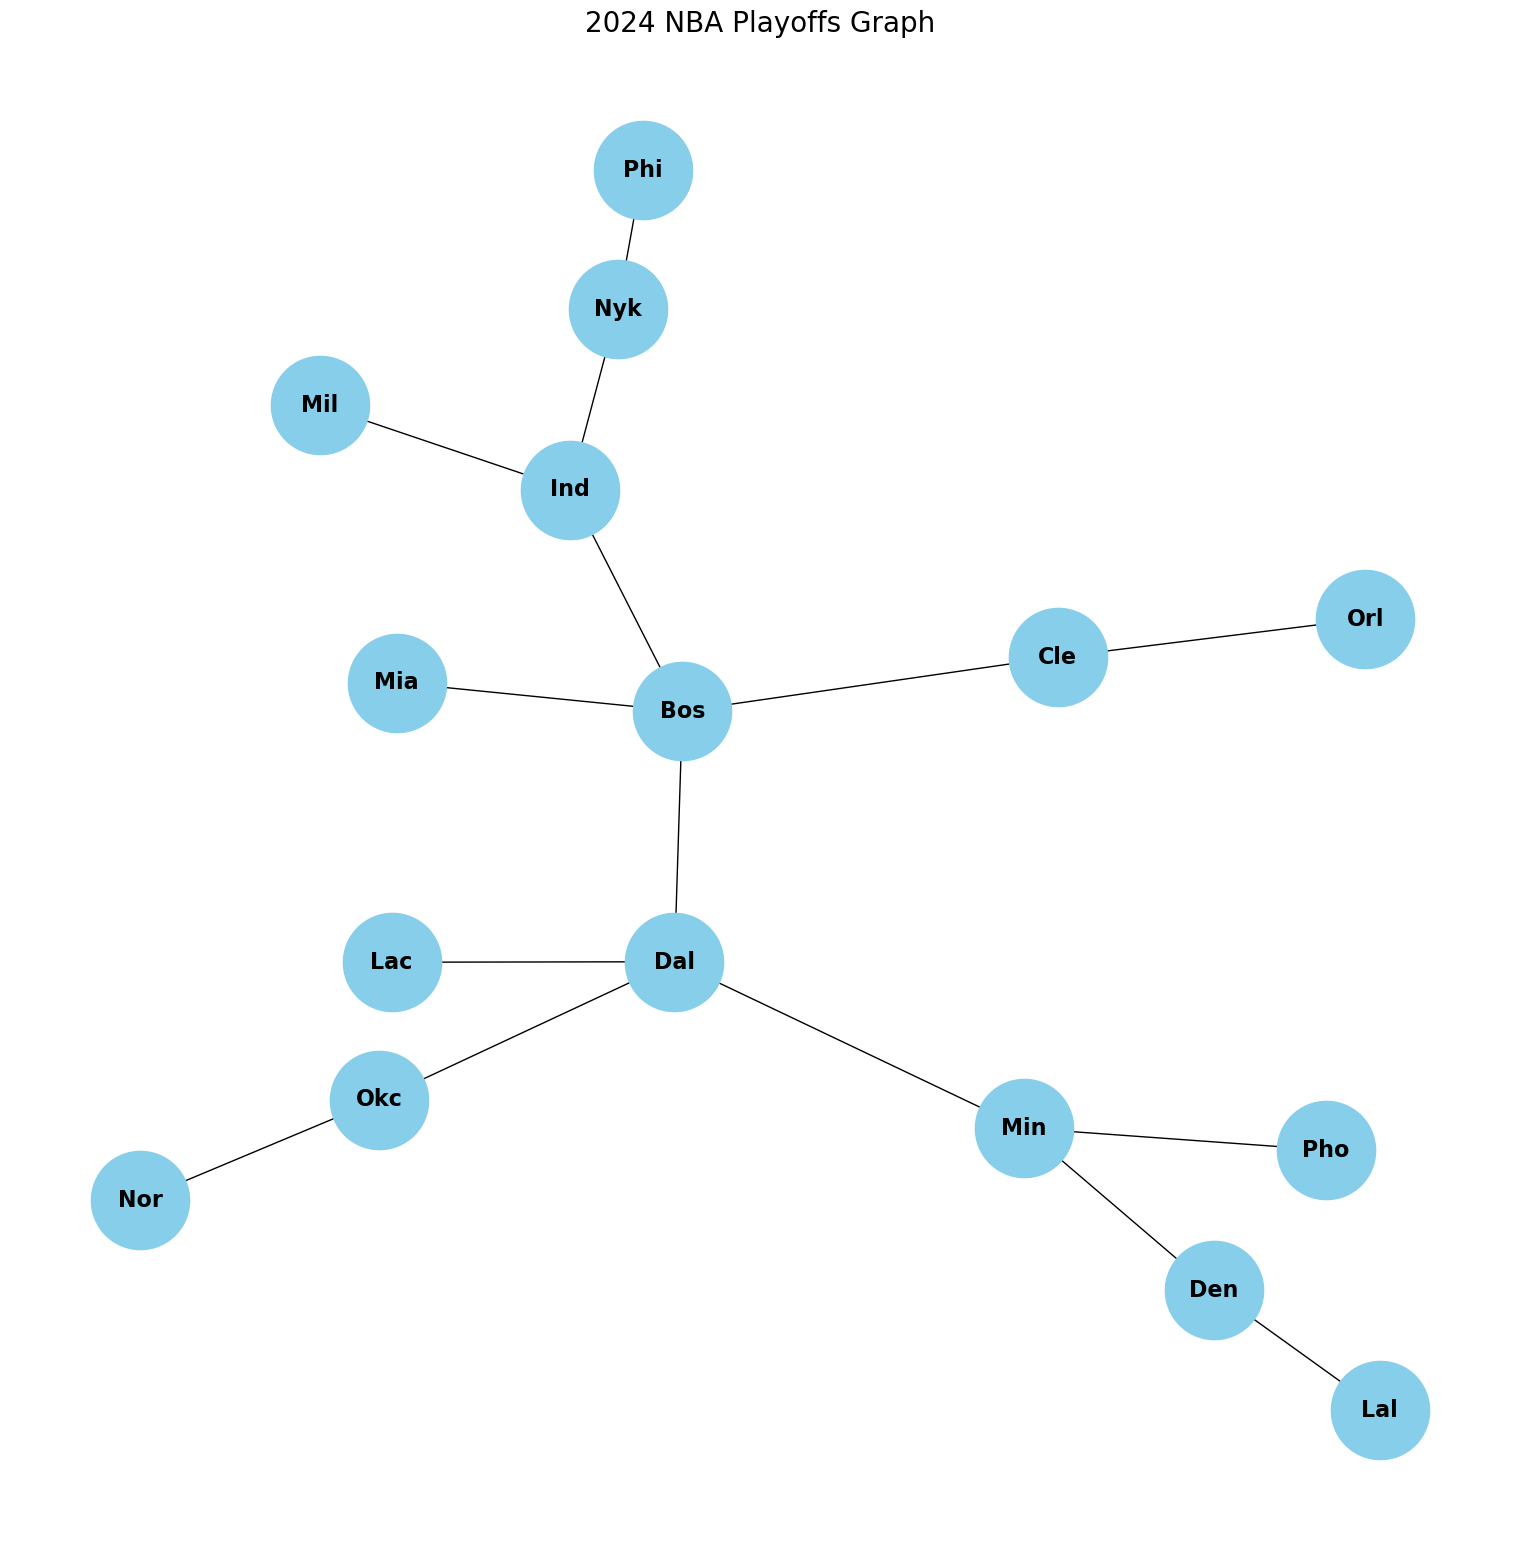

In [36]:
plt.figure(figsize=(15, 15))
nx.draw(g, with_labels=True, node_size=5000, node_color="skyblue", edge_color="black", font_size=16, font_weight="bold", arrows=True)
plt.title("2024 NBA Playoffs Graph", fontsize=20)
plt.show()

I wanted to take a look at a couple of other types of graphs. I used the data to draw a circular graph and Krackhardt Kite graph:

## Draw Circular Graph

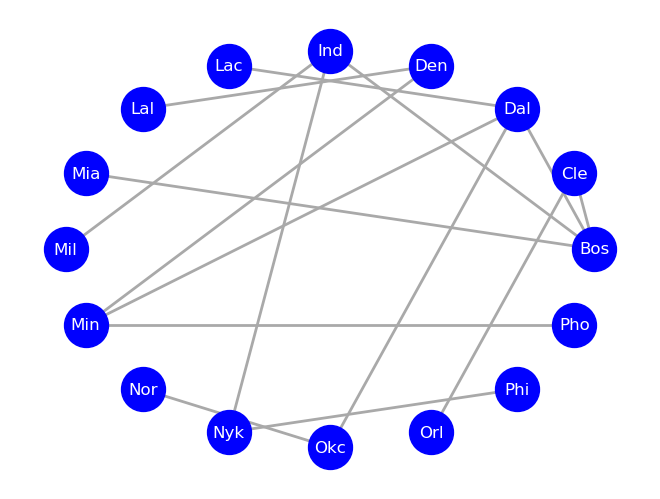

In [14]:
nx.draw_circular(g, with_labels=True, node_size=1000, node_color="b", font_size=12, font_color="white", font_family="sans-serif", 
                 width=2, edge_color="darkgray")

## Krackhardt Kite Graph

There are only 10 nodes and 18 edges in a Krackhardt Kite graph, so I removed 6 of the teams (nodes) that were eliminated in the first round:

In [15]:
# Removing teams
g.remove_nodes_from(["Phi", "Nor", "Mil", "Lal", "Lac", "Orl"])

In [20]:
revised_teams = list(g.nodes())

In [23]:
# Initiate Krackhardt Kite graph
G = nx.krackhardt_kite_graph()

In [21]:
team_labels = {i: revised_teams[i] for i in range(len(revised_teams))}

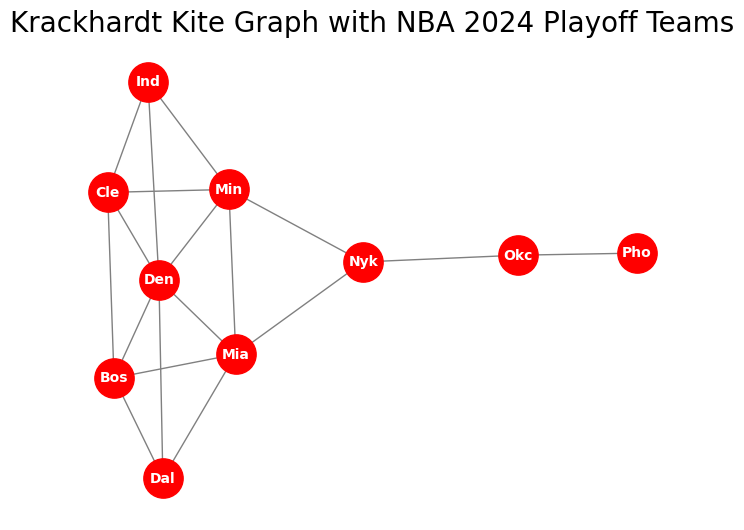

In [57]:
pos = nx.spring_layout(G, seed=100) # For positioning the nodes
nx.draw(G, pos, with_labels=True, labels=team_labels, node_color="red", node_size=800, font_color="white", font_size=10, font_weight="bold", edge_color="gray")
plt.title("Krackhardt Kite Graph with NBA 2024 Playoff Teams", fontsize=20);